In [2]:
# See instructions above for how to modify for the SCC
import numpy as np

apples = np.load('gdrive/MyDrive/full_numpy_bitmap_apple.npy')
birds = np.load('gdrive/MyDrive/full_numpy_bitmap_bird.npy')
cookies = np.load('gdrive/MyDrive/full_numpy_bitmap_cookie.npy')

In [3]:
all_kinds = np.concatenate((apples,birds,cookies))

In [4]:
# Note that labels should be 0 to n-1 to work with to_categorical
labels = [0]*len(apples)+[1]*len(birds)+[2]*len(cookies)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(all_kinds, labels)

In [6]:
# TODO - trivial but easy to forget
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [7]:
x_train[0].shape

(784,)

In [8]:
# TODO x_train
x_train = x_train.reshape(len(x_train),28, 28)


In [9]:
# TODO x_test
x_test = x_test.reshape(len(x_test), 28, 28)


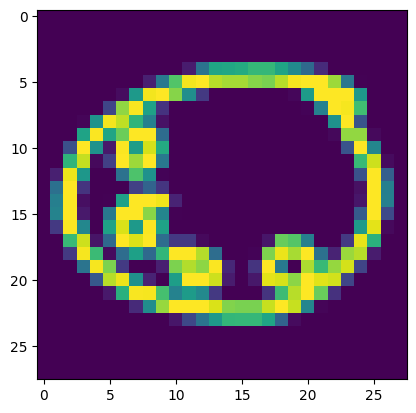

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0]) # Should be a recognizable image if we reshaped correctly

As the last step before creating the neural network, we will turn the labels into one-hot encodings.

In [11]:
from tensorflow import keras
num_classes = 3
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
# Network structure from https://keras.io/examples/vision/mnist_convnet/

from tensorflow.keras import layers
import numpy as np

input_shape = (28, 28, 1)
num_classes = 3

# Borrowed from the Keras MNIST convnet tutorial
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
])



In [14]:
batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/3
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9760 - loss: 0.0754 - val_accuracy: 0.9809 - val_loss: 0.0597
Epoch 2/3
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9779 - loss: 0.0688 - val_accuracy: 0.9823 - val_loss: 0.0554
Epoch 3/3
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9791 - loss: 0.0652 - val_accuracy: 0.9808 - val_loss: 0.0594


In [15]:
# TODO
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.06424263119697571
Test accuracy: 0.9796215295791626


In [16]:
# Again, assumes Google Colab - skip if no
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls

dogs-vs-cats  drive  gdrive  __MACOSX  sample_data


In [18]:
# Modify paths here if working in the SCC
import tensorflow as tf
image_size = (180, 180)
batch_size = 32
# Data from https://www.kaggle.com/competitions/dogs-vs-cats/
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs-vs-cats/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs-vs-cats/train",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [19]:
input_shape = (180, 180, 3)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Model from https://keras.io/examples/vision/mnist_convnet/
model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(1. / 255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [20]:
epochs = 15

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

import keras.callbacks
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)  # Quit after 3 rounds of no validation loss improvement
]

model2.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks) # Validation data instead of fraction

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 49ms/step - accuracy: 0.6273 - loss: 0.6393 - val_accuracy: 0.7662 - val_loss: 0.4825
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.7773 - loss: 0.4752 - val_accuracy: 0.7804 - val_loss: 0.4702
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 42ms/step - accuracy: 0.8227 - loss: 0.3965 - val_accuracy: 0.7720 - val_loss: 0.5124
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8600 - loss: 0.3229 - val_accuracy: 0.7786 - val_loss: 0.5425
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8902 - loss: 0.2577 - val_accuracy: 0.7728 - val_loss: 0.6043


In [ ]:
model3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dense(num_classes, activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [ ]:
epochs = 15

model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
]
model3.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 52ms/step - accuracy: 0.5691 - loss: 0.6668 - val_accuracy: 0.7282 - val_loss: 0.5445
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7122 - loss: 0.5612 - val_accuracy: 0.7446 - val_loss: 0.5166
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.7629 - loss: 0.4961 - val_accuracy: 0.7424 - val_loss: 0.5241
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.8085 - loss: 0.4189 - val_accuracy: 0.7286 - val_loss: 0.6240
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.8486 - loss: 0.3463 - val_accuracy: 0.7306 - val_loss: 0.6357


In [ ]:
model4 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [ ]:
epochs = 15

model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
]
model4.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.6290 - loss: 0.6294 - val_accuracy: 0.7514 - val_loss: 0.5128
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.7553 - loss: 0.5008 - val_accuracy: 0.7682 - val_loss: 0.4868
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.8075 - loss: 0.4222 - val_accuracy: 0.8136 - val_loss: 0.4164
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.8333 - loss: 0.3685 - val_accuracy: 0.8262 - val_loss: 0.3999
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.8619 - loss: 0.3195 - val_accuracy: 0.8304 - val_loss: 0.4154
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.8905 - loss: 0.2691 - val_accuracy: 0.8340 - val_loss: 0.4287
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.9089 - loss: 0.2197 - val_accuracy: 0.8268 - val_loss: 0.4841


In [ ]:
model5 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [ ]:
epochs = 15

model5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
]
model5.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - accuracy: 0.5790 - loss: 0.6692 - val_accuracy: 0.7162 - val_loss: 0.5584
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 46ms/step - accuracy: 0.7268 - loss: 0.5427 - val_accuracy: 0.7394 - val_loss: 0.5163
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.7933 - loss: 0.4421 - val_accuracy: 0.8118 - val_loss: 0.4225
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.8386 - loss: 0.3637 - val_accuracy: 0.8364 - val_loss: 0.3724
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.8699 - loss: 0.3063 - val_accuracy: 0.8648 - val_loss: 0.3189
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 58ms/step - accuracy: 0.8919 - loss: 0.2548 - val_accuracy: 0.8626 - val_loss: 0.3275
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.9081 - loss: 0.2236 - val_accuracy: 0.8722 - val_loss: 0.3093
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 56ms/step - accuracy: 0.9194 - loss: 0.1873 - 

In [ ]:
model6 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.RandomFlip("horizontal"),
        layers.RandomCrop(180, 180),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [ ]:
epochs = 20

model6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
]
model6.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.5678 - loss: 0.6761 - val_accuracy: 0.7024 - val_loss: 0.5566
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.7031 - loss: 0.5700 - val_accuracy: 0.7874 - val_loss: 0.4461
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.7750 - loss: 0.4751 - val_accuracy: 0.8166 - val_loss: 0.4058
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.8098 - loss: 0.4136 - val_accuracy: 0.8392 - val_loss: 0.3568
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.8441 - loss: 0.3564 - val_accuracy: 0.8706 - val_loss: 0.2902
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.8645 - loss: 0.3125 - val_accuracy: 0.8712 - val_loss: 0.2972
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - accuracy: 0.8857 - loss: 0.2739 - val_accuracy: 0.8954 - val_loss: 0.2466
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.9010 - loss: 0.2412 - 

In [21]:
# TODO
from keras.applications.vgg16 import VGG16
from keras.models import Model

modelvg = VGG16(include_top=False, input_shape=(180,180,3)) # we'll replace the "top" with our own layers
for layer in modelvg.layers:
    layer.trainable = False  # these won't learn
# add new classifier layers
flat = layers.Flatten()(modelvg.layers[-1].output) # connect to last layer of VGG
drop1 = layers.Dropout(0.5)(flat)
cls = layers.Dense(128, activation='relu')(drop1)
drop2 = layers.Dropout(0.5)(cls)
output = layers.Dense(10, activation='softmax')(drop2)

modelvg = Model(inputs=modelvg.inputs, outputs=output)
# compile model - note we never did to_categorical so we'll use
# sparse_categorical_crossentropy
modelvg.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

modelvg.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_16']
Received: inputs=Tensor(shape=(None, 180, 180, 3))
  warnings.warn(msg)


625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 187ms/step - accuracy: 0.8795 - loss: 3.6389 - val_accuracy: 0.9552 - val_loss: 0.1229
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 210ms/step - accuracy: 0.9375 - loss: 0.2024 - val_accuracy: 0.9542 - val_loss: 0.1214
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 209ms/step - accuracy: 0.9464 - loss: 0.1609 - val_accuracy: 0.9638 - val_loss: 0.1078
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 131s 209ms/step - accuracy: 0.9549 - loss: 0.1445 - val_accuracy: 0.9646 - val_loss: 0.0901
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 209ms/step - accuracy: 0.9536 - loss: 0.1446 - val_accuracy: 0.9670 - val_loss: 0.1032
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 210ms/step - accuracy: 0.9581 - loss: 0.1297 - val_accuracy: 0.9644 - val_loss: 0.1080
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 206ms/step - accuracy: 0.9557 - loss: 0.1393 - val_accuracy: 0.9618 - val_loss: 0.0933
